In [39]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
!pip install pmdarima

In [3]:
df=pd.read_csv('GoldPrice.csv')

In [4]:
df.head(5)

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,01-10-2000,4538,1455.51,8.0,46.318297,3711.02,37.23,116.65
1,01-11-2000,4483,1512.47,8.0,46.783613,3997.99,37.31,115.24
2,01-12-2000,4541,1178.11,8.0,46.745856,3972.12,36.98,109.56
3,01-01-2001,4466,1208.18,8.0,46.536033,4326.72,36.90,110.52
4,01-02-2001,4370,1267.18,7.5,46.514595,4247.04,36.73,112.01


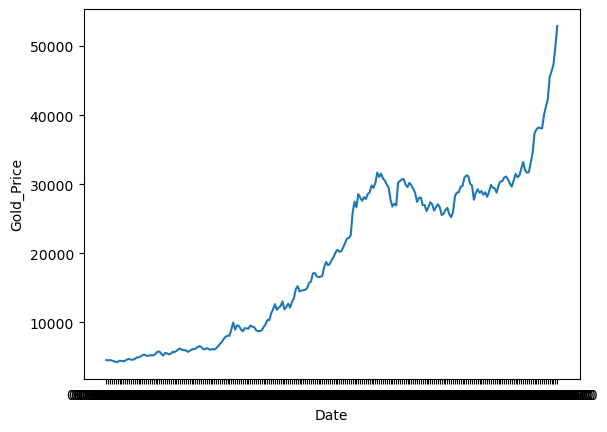

In [5]:
sns.lineplot(data=df, x="Date", y="Gold_Price", label="")
plt.show()

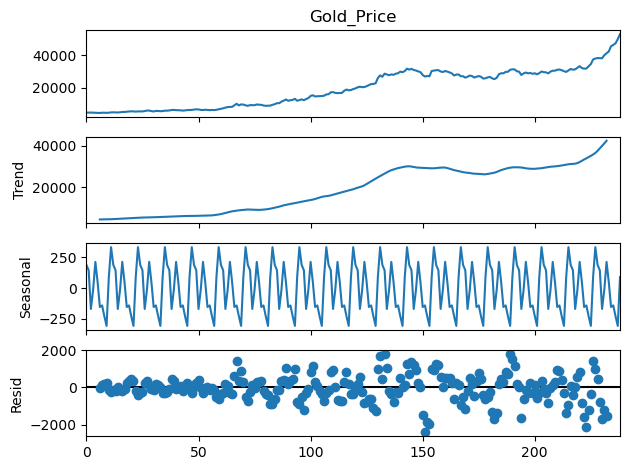

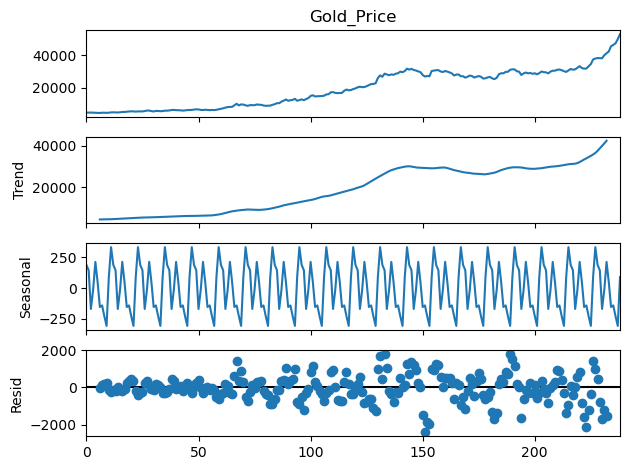

In [7]:
dec = seasonal_decompose(df['Gold_Price'], period = 12, model='additive')
dec.plot( )

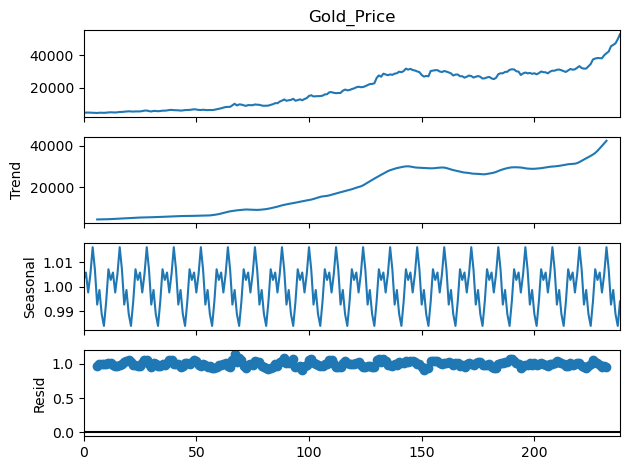

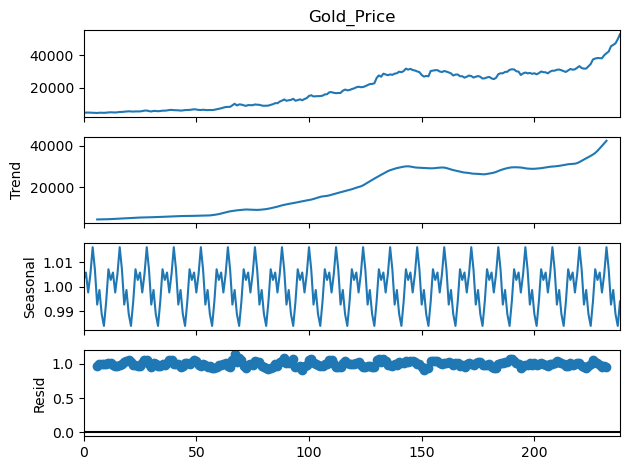

In [8]:
dec = seasonal_decompose(df['Gold_Price'], period = 12, model='multiplicative')
dec.plot( )

# Lissage

In [9]:
df['mean_simple']=df['Gold_Price'].rolling(window=12).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

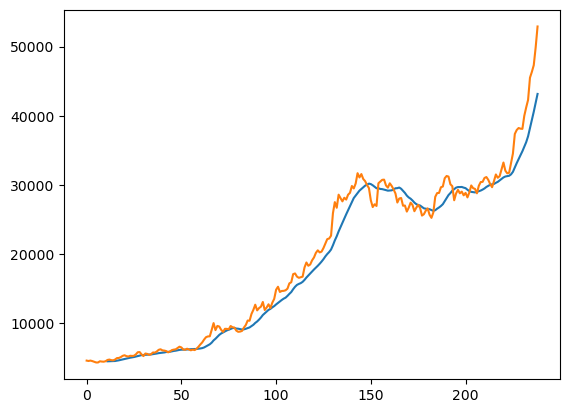

In [15]:
plt.plot(df['mean_simple'],label='mean_simple')
plt.plot(df['Gold_Price'],label='original')
plt.show


In [11]:
df['mean_simple_centred']=df['Gold_Price'].rolling(window=12, center=True).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

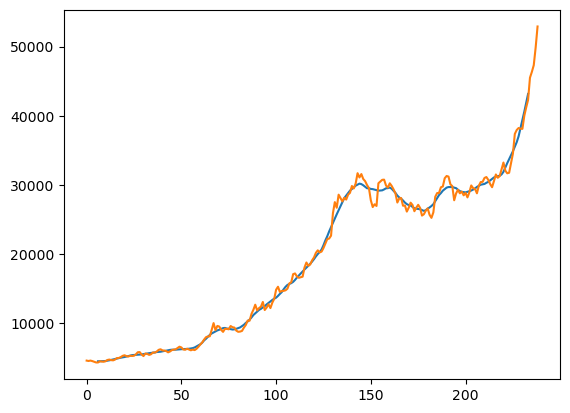

In [16]:
plt.plot(df['mean_simple_centred'],label='mean_simple')
plt.plot(df['Gold_Price'],label='original')
plt.show


In [46]:
df['exp'] = df['Gold_Price'].ewm(alpha=0.2 ).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

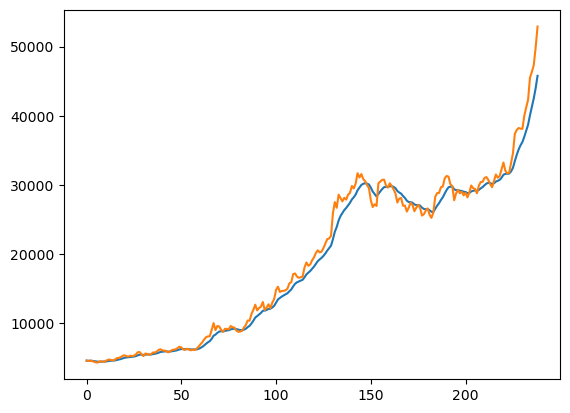

In [47]:
plt.plot(df['exp'],label='exp')
plt.plot(df['Gold_Price'],label='original')
plt.show


# Part 3

In [17]:
df['mean']=df['Gold_Price'].rolling(window=12).mean()

In [18]:
df['std']=df['Gold_Price'].rolling(window=12).std()

<function matplotlib.pyplot.show(close=None, block=None)>

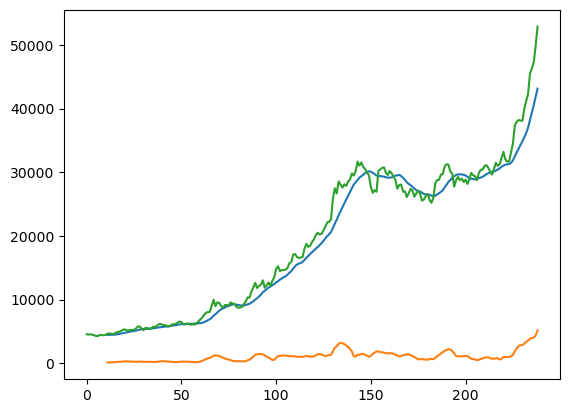

In [19]:
plt.plot(df['mean'],label='moyenne')
plt.plot(df['std'],label='ecart_type')
plt.plot(df['Gold_Price'],label='original')
plt.show

In [21]:
teststationnaire=adfuller(df['Gold_Price'])

In [22]:
teststationnaire[1]

0.9989211091268941

In [ ]:
# teststationnaire[1]> 0.05 donc la serie n'est pas stationnaire

In [ ]:
#5 l'hypothese nulle ( Ho) du test ADF est que la serie n'est pas stationnaire

In [23]:
df['diff']=df['Gold_Price'].diff()

In [24]:
df['moy_diff']=df['diff'].rolling(window=12).mean()

In [25]:
df['ecarttype_diff']=df['diff'].rolling(window=12).std()

<function matplotlib.pyplot.show(close=None, block=None)>

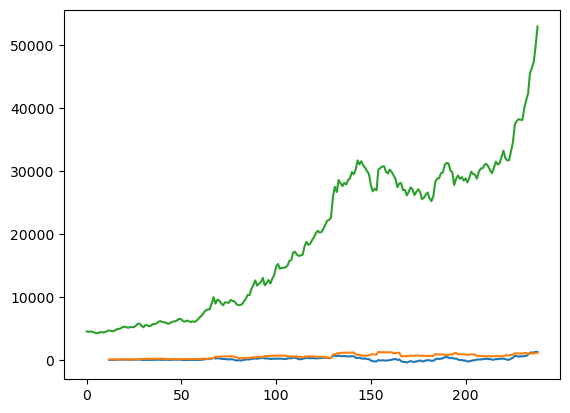

In [27]:
plt.plot(df['moy_diff'],label='moyenne diff')
plt.plot(df['ecarttype_diff'],label='ecart_type diff')
plt.plot(df['Gold_Price'],label='original')
plt.show

In [48]:
#avec diff la serie est devenue stationnaire

# ARIMA 

In [28]:
from pmdarima import auto_arima

In [31]:
model=auto_arima(df['Gold_Price'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=3805.723, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3913.835, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=3869.868, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=3804.480, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=3804.234, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=3805.507, Time=0.09 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=3803.797, Time=0.10 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=3803.940, Time=0.06 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=3805.725, Time=0.16 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=3805.246, Time=0.09 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=3807.411, Time=0.27 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=3804.850, Time=0.23 sec

Best model:  ARIMA(1,2,2)(0,0,0)[0]          
Total fit time: 1.275 seconds


In [40]:
model = ARIMA(df['Gold_Price'], order=(1, 2, 2))

In [41]:
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Gold_Price   No. Observations:                  239
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -1897.899
Date:                Fri, 10 May 2024   AIC                           3803.797
Time:                        10:39:23   BIC                           3817.669
Sample:                             0   HQIC                          3809.389
                                - 239                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6987      0.203     -3.443      0.001      -1.096      -0.301
ma.L1         -0.0896      0.181     -0.496      0.620      -0.444       0.265
ma.L2         -0.7117      0.136     -5.243      0.0

In [42]:
forecast = model_fit.forecast(12)

In [43]:
forecast

239    54440.382763
240    55706.665798
241    57152.574176
242    58472.985479
243    59881.076591
244    61227.909312
245    62617.540832
246    63977.270535
247    65357.891447
248    66723.916503
249    68100.139102
250    69469.237084
Name: predicted_mean, dtype: float64

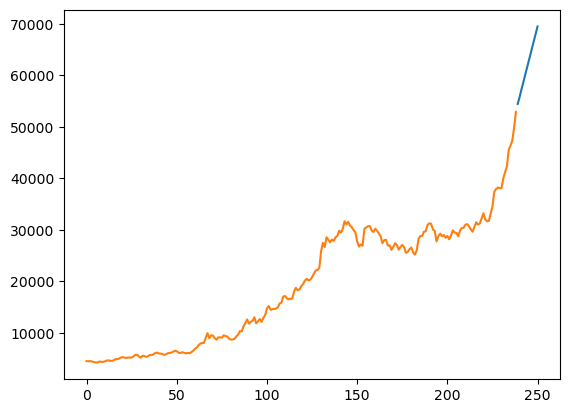

In [44]:
plt.plot(forecast,label='forcasted')
plt.plot(df['Gold_Price'],label='Actual')